# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Importar librerias

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

## Acceder a los datos
### -Analizar los datos

In [8]:
visits = pd.read_csv("/datasets/visits_log_us.csv")
orders = pd.read_csv("/datasets/orders_log_us.csv")
costs = pd.read_csv("/datasets/costs_us.csv")

In [9]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [10]:
visits["Source Id"].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [11]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
print(visits.head(10))
print("-------------------------------------------------------")
print(visits.info())
print("-------------------------------------------------------")
visitas_duplicados = visits.duplicated().sum()
print("Cantidad de datos duplicadas:",visitas_duplicados)
print("-------------------------------------------------------")
print(visits.isnull().sum())
print(visits.isna().sum())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9 

In [13]:
print(orders.head(10))
print("-------------------------------------------------------")
print(orders.info())
print("-------------------------------------------------------")
ordenes_duplicados = orders.duplicated().sum()
print("Cantidad de datos duplicadas:",ordenes_duplicados)
print("-------------------------------------------------------")
print(orders.isnull().sum())
print(orders.isna().sum())

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usag

In [14]:
print(costs.head(10))
print("-------------------------------------------------------")
print(costs.info())
print("-------------------------------------------------------")
costos_duplicados = costs.duplicated().sum()
print("Cantidad de datos duplicadas:",costos_duplicados)
print("-------------------------------------------------------")
print(costs.isnull().sum())
print(costs.isna().sum())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
-------------------------------------------------------
Cantidad de datos duplicadas: 0
-------------------------------------------------------
source_id    0
dt           0
costs        0
dtype: int64
source_id    0
d

## Observaciones
    -Hay que cambiar los nombres de las columnas a minusculas y reemplazar los espacios por guiones bajos
    -Hay tipos de datos por cambiar
    -No parece haber datos duplicados
    -No parece haber datos faltantes o nulos

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Importación de librerías y carga/validación de datasets muy ordenadas: muestras, `info()`, `describe()`, conteo de nulos/duplicados y verificación de columnas. Base sólida para avanzar con métricas y visualizaciones. </div>


## Cambio en columnas
    - Minusculas

In [15]:
visits.columns = visits.columns.str.lower()
print(visits.head(0))

Empty DataFrame
Columns: [device, end ts, source id, start ts, uid]
Index: []


In [16]:
visits["device"] = visits["device"].apply(str.lower)
visitas_duplicados = visits.duplicated().sum()
print("Cantidad de datos duplicadas:",visitas_duplicados)

Cantidad de datos duplicadas: 0


In [17]:
orders.columns = orders.columns.str.lower()
print(orders.head(0))

Empty DataFrame
Columns: [buy ts, revenue, uid]
Index: []


In [18]:
print(costs.head(0))

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []


    -Remplazo de espacios por guiones bajos

In [19]:
visits.columns = visits.columns.str.replace(" ","_")
print(visits.head(0))

Empty DataFrame
Columns: [device, end_ts, source_id, start_ts, uid]
Index: []


In [20]:
orders.columns = orders.columns.str.replace(" ","_")
print(orders.head(0))

Empty DataFrame
Columns: [buy_ts, revenue, uid]
Index: []


In [21]:
print(costs.head(0))

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La estandarización de nombres de columnas a minúsculas y con guiones bajos quedó prolija y consistente, lo que facilitará el análisis posterior y la lectura del código. Buen inicio en la limpieza de datos. </div>


## Cambio de tipos de datos

In [22]:
visits["end_ts"] = pd.to_datetime(visits["end_ts"],format="%Y-%m-%d %H:%M:%S")
visits["start_ts"] = pd.to_datetime(visits["start_ts"],format="%Y-%m-%d %H:%M:%S")
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


In [23]:
orders["buy_ts"] = pd.to_datetime(orders["buy_ts"],format="%Y-%m-%d %H:%M:%S")
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [24]:
costs["dt"] = pd.to_datetime(costs["dt"],format="%Y-%m-%d %H:%M:%S")
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Conversión de columnas a formato datetime realizada con precisión en todos los datasets, asegurando consistencia para cálculos y análisis temporales posteriores. Muy bien estructurado este paso. </div>



## Visitas
    -Cantidad de personas que lo usan cada día, semana y mes
    -Sesiones por un día
    -Duración por sesión
    -Regreso de usuarios

In [25]:
daily_users = visits.groupby('start_ts')['uid'].nunique()
print("Usuarios Únicos por Día:\n")
print(daily_users.head())
weekly_users = visits.set_index('start_ts').resample('W')['uid'].nunique()
print("\nUsuarios Únicos por Semana:\n")
print(weekly_users.head())
monthly_users = visits.set_index('start_ts').resample('M')['uid'].nunique()
print("\nUsuarios Únicos por Mes:\n")
print(monthly_users.head())

Usuarios Únicos por Día:

start_ts
2017-06-01 00:01:00    1
2017-06-01 00:02:00    2
2017-06-01 00:04:00    1
2017-06-01 00:09:00    1
2017-06-01 00:14:00    3
Name: uid, dtype: int64

Usuarios Únicos por Semana:

start_ts
2017-06-04    2021
2017-06-11    4129
2017-06-18    2812
2017-06-25    2878
2017-07-02    3064
Freq: W-SUN, Name: uid, dtype: int64

Usuarios Únicos por Mes:

start_ts
2017-06-30    13259
2017-07-31    14183
2017-08-31    11631
2017-09-30    18975
2017-10-31    29692
Freq: M, Name: uid, dtype: int64


In [27]:
daily_sessions = visits.groupby('start_ts')['source_id'].count()
print("Número de Sesiones por Día:\n")
print(daily_sessions.head())
print(f"\nNúmero promedio de sesiones por día: {daily_sessions.mean():.2f}")

Número de Sesiones por Día:

start_ts
2017-06-01 00:01:00    1
2017-06-01 00:02:00    2
2017-06-01 00:04:00    1
2017-06-01 00:09:00    1
2017-06-01 00:14:00    3
Name: source_id, dtype: int64

Número promedio de sesiones por día: 1.60


In [28]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
print("Estadísticas de la Duración de la Sesión (en segundos):\n")
print(visits['session_duration_sec'].describe())
average_duration_min = visits['session_duration_sec'].mean() / 60
median_duration_min = visits['session_duration_sec'].median() / 60
print(f"\nDuración promedio de la sesión: {average_duration_min:.2f} minutos")
print(f"Duración mediana de la sesión: {median_duration_min:.2f} minutos")

Estadísticas de la Duración de la Sesión (en segundos):

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_sec, dtype: float64

Duración promedio de la sesión: 10.72 minutos
Duración mediana de la sesión: 5.00 minutos


In [29]:
sessions_per_user = visits.groupby('uid')['source_id'].count()
returning_users = sessions_per_user[sessions_per_user > 1].index
returning_visits = visits[visits['uid'].isin(returning_users)].sort_values(by=['uid', 'start_ts'])
returning_visits['time_between_sessions'] = returning_visits.groupby('uid')['start_ts'].diff()
average_return_time_days = returning_visits['time_between_sessions'].mean().days
print(f"Porcentaje de usuarios que regresan: {(len(returning_users) / visits['uid'].nunique() * 100):.2f}%")
print(f"Tiempo promedio entre visitas para usuarios que regresan: {average_return_time_days} días")

Porcentaje de usuarios que regresan: 22.85%
Tiempo promedio entre visitas para usuarios que regresan: 28 días


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis de usuarios por día, semana y mes, junto con sesiones, duración y retorno de clientes, está muy completo. Los cálculos muestran dominio de agrupaciones y resampleo en Pandas, logrando métricas claras para el comportamiento de visitas. </div>


## Ventas
    -Cuando inician a comprar
    -Pedidos durante un periodo de tiempo dado
    -Tamaño promedio de compras
    -Dinero que tienen (LTV)

In [30]:
first_visit_date = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit_date.columns = ['uid', 'first_visit_date']
first_order_date = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date.columns = ['uid', 'first_order_date']
conversion_data = pd.merge(first_visit_date, first_order_date, on='uid')
conversion_data['time_to_convert'] = (conversion_data['first_order_date'] - conversion_data['first_visit_date']).dt.days
print("Distribución del tiempo de conversión (en días):")
print(conversion_data['time_to_convert'].value_counts(normalize=True).head())
print(f"\nTiempo promedio de conversión: {conversion_data['time_to_convert'].mean():.2f} días")

Distribución del tiempo de conversión (en días):
0    0.721819
1    0.027681
2    0.015415
3    0.011883
4    0.008871
Name: time_to_convert, dtype: float64

Tiempo promedio de conversión: 16.73 días


In [31]:
daily_orders = orders.groupby('buy_ts')['uid'].count()
print("Número de pedidos por día:\n")
print(daily_orders.head())
weekly_orders = orders.set_index('buy_ts').resample('W')['uid'].count()
print("\nNúmero de pedidos por semana:\n")
print(weekly_orders.head())
monthly_orders = orders.set_index('buy_ts').resample('M')['uid'].count()
print("\nNúmero de pedidos por mes:\n")
print(monthly_orders.head())

Número de pedidos por día:

buy_ts
2017-06-01 00:10:00    1
2017-06-01 00:25:00    1
2017-06-01 00:27:00    1
2017-06-01 00:29:00    1
2017-06-01 07:58:00    1
Name: uid, dtype: int64

Número de pedidos por semana:

buy_ts
2017-06-04    340
2017-06-11    938
2017-06-18    343
2017-06-25    371
2017-07-02    460
Freq: W-SUN, Name: uid, dtype: int64

Número de pedidos por mes:

buy_ts
2017-06-30    2354
2017-07-31    2363
2017-08-31    1807
2017-09-30    3387
2017-10-31    5679
Freq: M, Name: uid, dtype: int64


In [32]:
average_order_value = orders['revenue'].mean()
print(f"El tamaño promedio de compra (AOV) es de: ${average_order_value:.2f}")

El tamaño promedio de compra (AOV) es de: $5.00


In [36]:
first_visit_source = visits.groupby('uid')['source_id'].first().reset_index()
orders_with_source = pd.merge(orders, first_visit_source, on='uid')
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index()
users_by_source = orders_with_source.groupby('source_id')['uid'].nunique().reset_index()
users_by_source.columns = ['source_id', 'total_users']
ltv_by_source = pd.merge(revenue_by_source, users_by_source, on='source_id')
ltv_by_source['LTV'] = ltv_by_source['revenue'] / ltv_by_source['total_users']
print("LTV (Valor de vida del cliente) por fuente de marketing:")
print(ltv_by_source)

LTV (Valor de vida del cliente) por fuente de marketing:
   source_id   revenue  total_users        LTV
0          1  38560.06         3743  10.301913
1          2  65152.26         4323  15.071076
2          3  44317.68         9138   4.849823
3          4  52479.75         9823   5.342538
4          5  40357.91         6839   5.901142
5          7      1.22            1   1.220000
6          9   7076.98         1415   5.001399
7         10   4111.34         1241   3.312925


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis de ventas está muy completo: identificaste tiempos de conversión, evolución de pedidos en diferentes escalas, valor promedio de compra y cálculo de LTV por fuente. La organización y claridad de las métricas refuerzan bien el estudio de negocio. </div>


## Marketing
    -¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
    -¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
    -¿Cuán rentables eran las inversiones? (ROMI)

In [37]:
total_cost = costs['costs'].sum()
print(f"Gasto total de marketing en todo el período: ${total_cost:,.2f}")
cost_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("\nGasto total por fuente de adquisición:")
print(cost_by_source.to_string())
monthly_cost = costs.set_index('dt').resample('M')['costs'].sum()
print("\nGasto de marketing por mes:")
print(monthly_cost.to_string())

Gasto total de marketing en todo el período: $329,131.62

Gasto total por fuente de adquisición:
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49

Gasto de marketing por mes:
dt
2017-06-30    18015.00
2017-07-31    18240.59
2017-08-31    14790.54
2017-09-30    24368.91
2017-10-31    36322.88
2017-11-30    37907.88
2017-12-31    38315.35
2018-01-31    33518.52
2018-02-28    32723.03
2018-03-31    30415.27
2018-04-30    22289.38
2018-05-31    22224.27
Freq: M


In [38]:
orders_with_source = pd.merge(orders, visits.groupby('uid')['source_id'].first(), on='uid')
customers_by_source = orders_with_source.groupby('source_id')['uid'].nunique()
cac_data = pd.DataFrame(cost_by_source).join(customers_by_source)
cac_data.columns = ['costs', 'customers']
cac_data['cac'] = cac_data['costs'] / cac_data['customers']
print("Costo de Adquisición de Clientes (CAC) por fuente:")
print(cac_data[['cac']].sort_values(by='cac').to_string())

Costo de Adquisición de Clientes (CAC) por fuente:
                 cac
source_id           
9           3.899286
10          4.691773
1           5.565928
4           6.217408
5           7.567934
2           9.901929
3          15.465269


In [39]:
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum()
romi_data = pd.DataFrame(revenue_by_source).join(cost_by_source)
romi_data.columns = ['revenue', 'costs']
romi_data['romi'] = (romi_data['revenue'] - romi_data['costs']) / romi_data['costs']
romi_data['romi_percent'] = romi_data['romi'] * 100
print("Retorno de la Inversión en Marketing (ROMI) por fuente:")
print(romi_data[['romi_percent']].sort_values(by='romi_percent', ascending=False).to_string())

Retorno de la Inversión en Marketing (ROMI) por fuente:
           romi_percent
source_id              
1             85.088851
2             52.203427
9             28.264483
4            -14.071301
5            -22.024399
10           -29.388629
3            -68.640554
7                   NaN


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis de marketing está muy bien estructurado: lograste calcular con claridad los costos totales, CAC y ROMI por fuente, mostrando qué canales fueron rentables y cuáles no. Gran integración de métricas financieras al estudio. </div>


## Gráficas

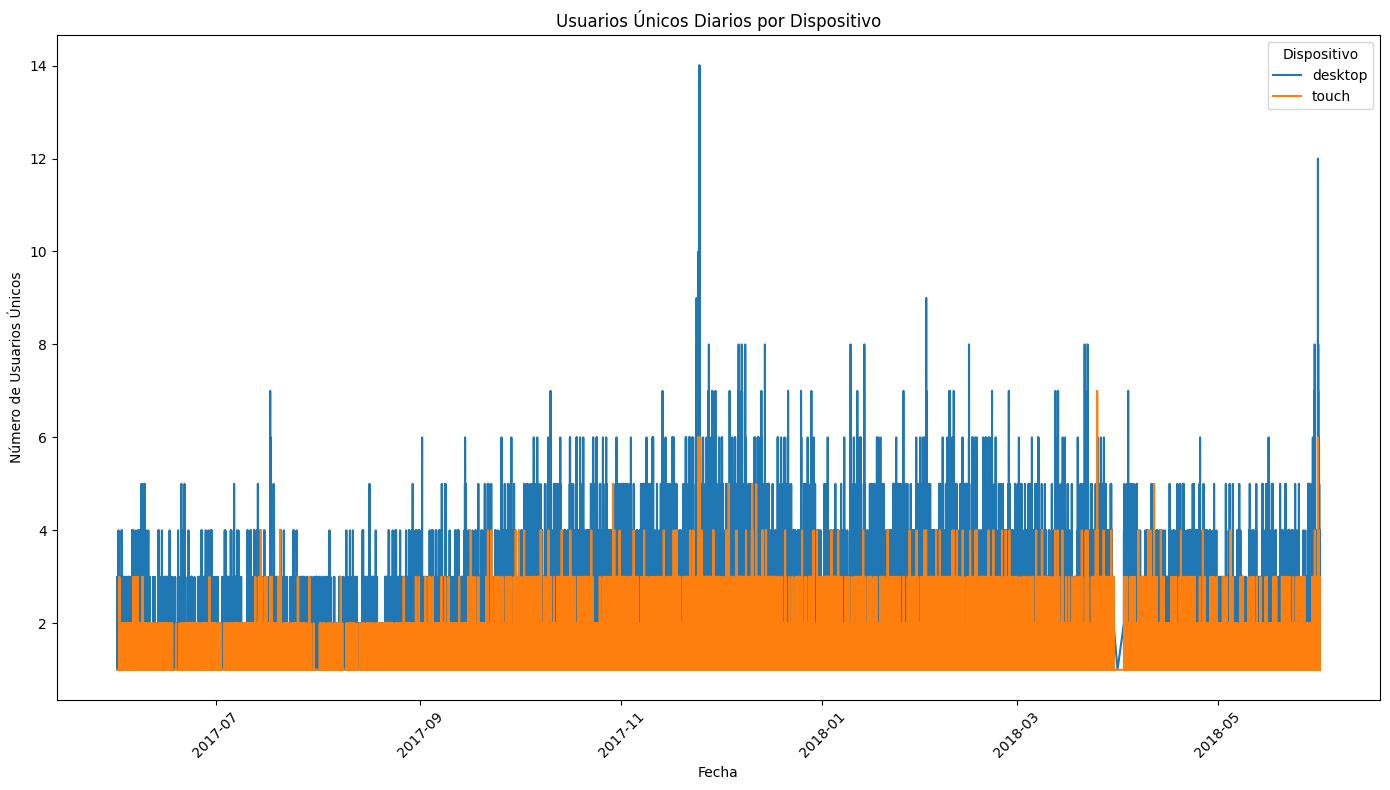

In [46]:
users_by_device_daily = visits.groupby(['start_ts', 'device'])['uid'].nunique().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=users_by_device_daily, x='start_ts', y='uid', hue='device')
plt.title('Usuarios Únicos Diarios por Dispositivo')
plt.xlabel('Fecha')
plt.ylabel('Número de Usuarios Únicos')
plt.xticks(rotation=45)
plt.legend(title='Dispositivo')
plt.tight_layout()
plt.show()

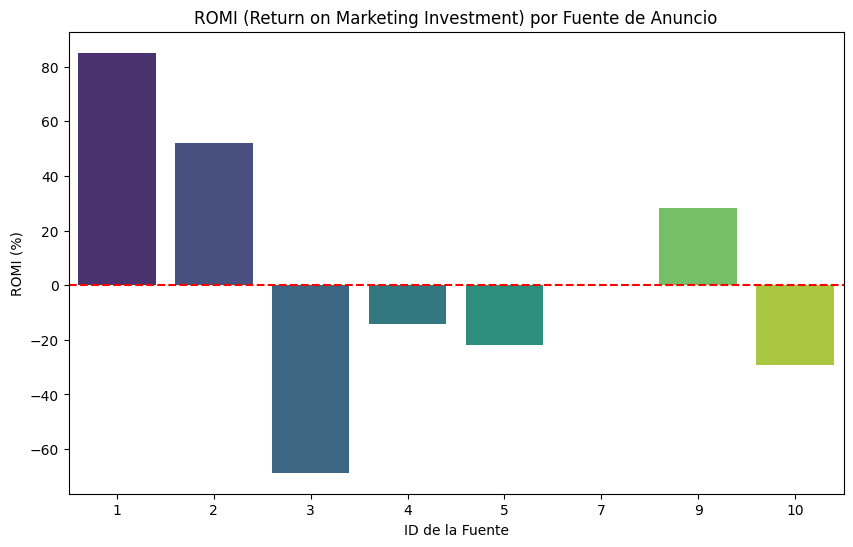

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=romi_data.index, y='romi_percent', data=romi_data, palette='viridis')
plt.title('ROMI (Return on Marketing Investment) por Fuente de Anuncio')
plt.xlabel('ID de la Fuente')
plt.ylabel('ROMI (%)')
plt.axhline(0, color='red', linestyle='--') # Línea de referencia en 0
plt.show()

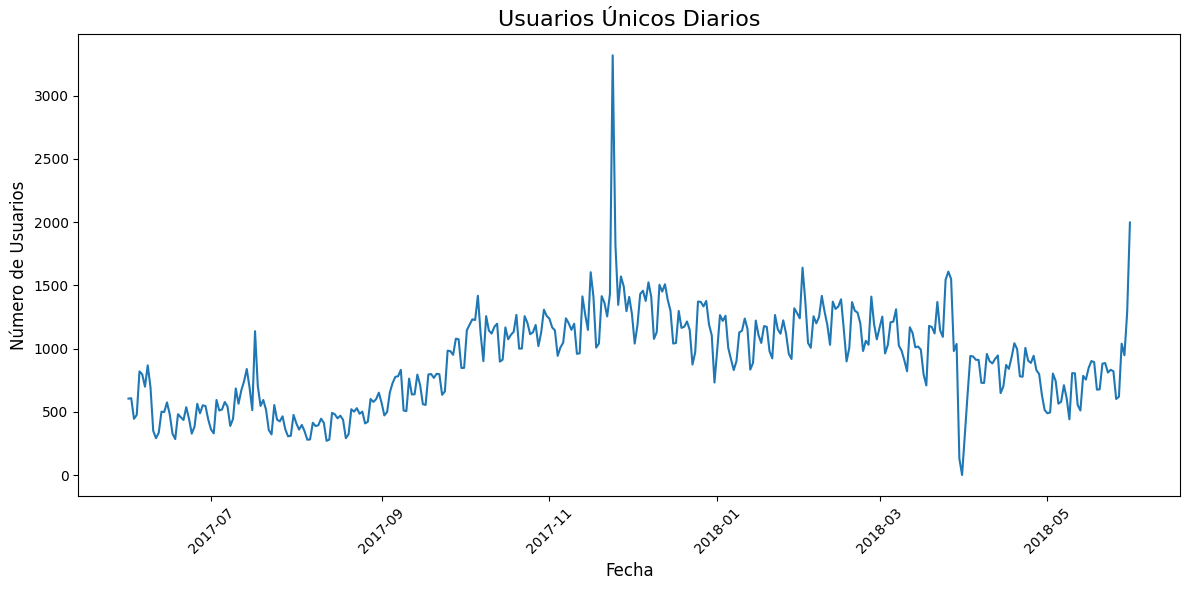

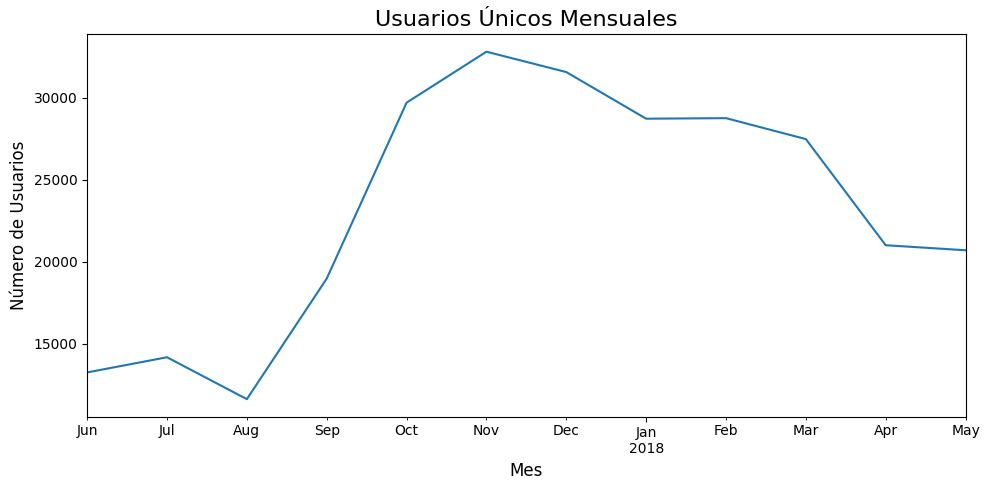

In [40]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
daily_users = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique()
monthly_users = visits.groupby(visits['start_ts'].dt.to_period('M'))['uid'].nunique()
plt.figure(figsize=(12, 6))
daily_users.plot(kind='line')
plt.title('Usuarios Únicos Diarios', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
monthly_users.plot(kind='line')
plt.title('Usuarios Únicos Mensuales', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.tight_layout()
plt.show()

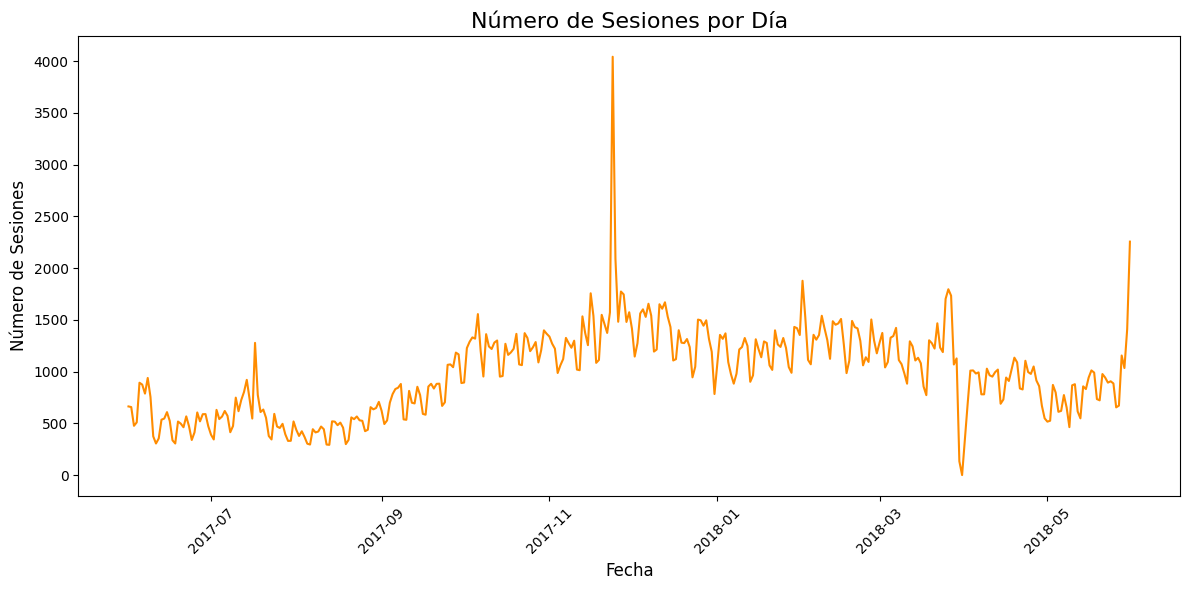

In [41]:
sessions_per_day = visits.groupby(visits['start_ts'].dt.date).size()
plt.figure(figsize=(12, 6))
sessions_per_day.plot(kind='line', color='darkorange')
plt.title('Número de Sesiones por Día', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Sesiones', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

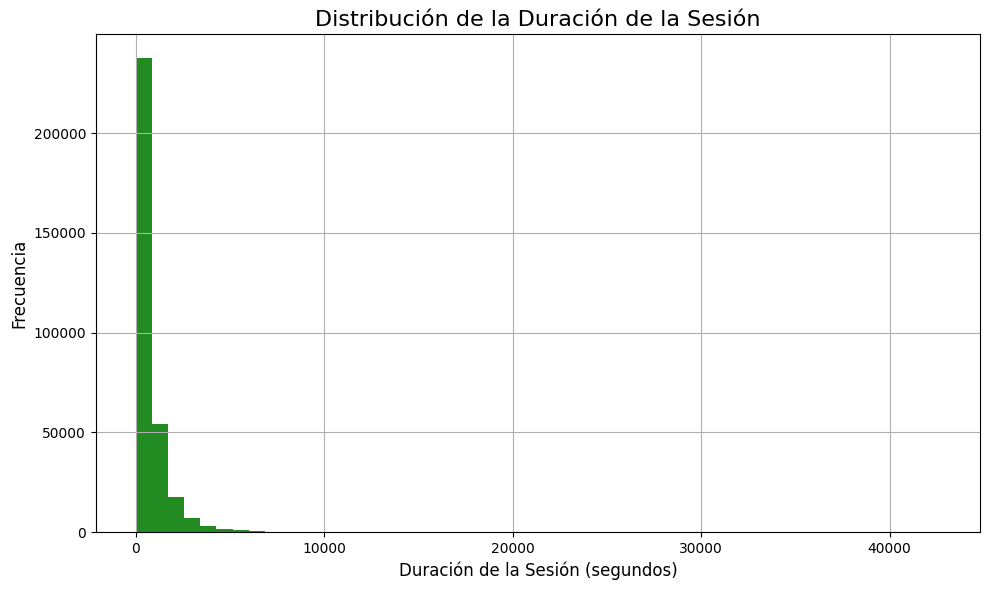

In [42]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
plt.figure(figsize=(10, 6))
plt.title('Distribución de la Duración de la Sesión', fontsize=16)
visits['session_duration_sec'][visits['session_duration_sec'] > 0].hist(bins=50, color='forestgreen')
plt.xlabel('Duración de la Sesión (segundos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

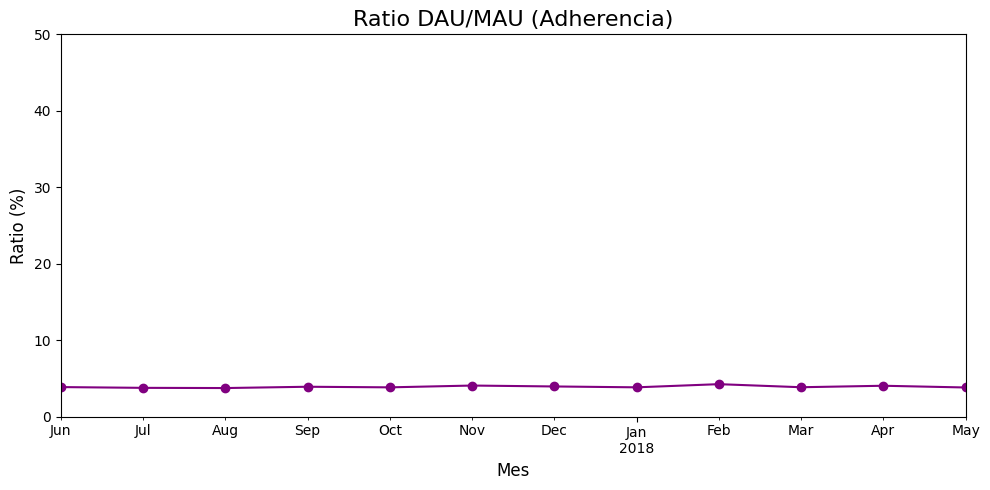

In [43]:
dau_promedio_mensual = daily_users.groupby(pd.PeriodIndex(daily_users.index, freq='M')).mean()
stickiness = (dau_promedio_mensual / monthly_users) * 100
plt.figure(figsize=(10, 5))
stickiness.plot(kind='line', marker='o', color='purple')
plt.title('Ratio DAU/MAU (Adherencia)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ratio (%)', fontsize=12)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

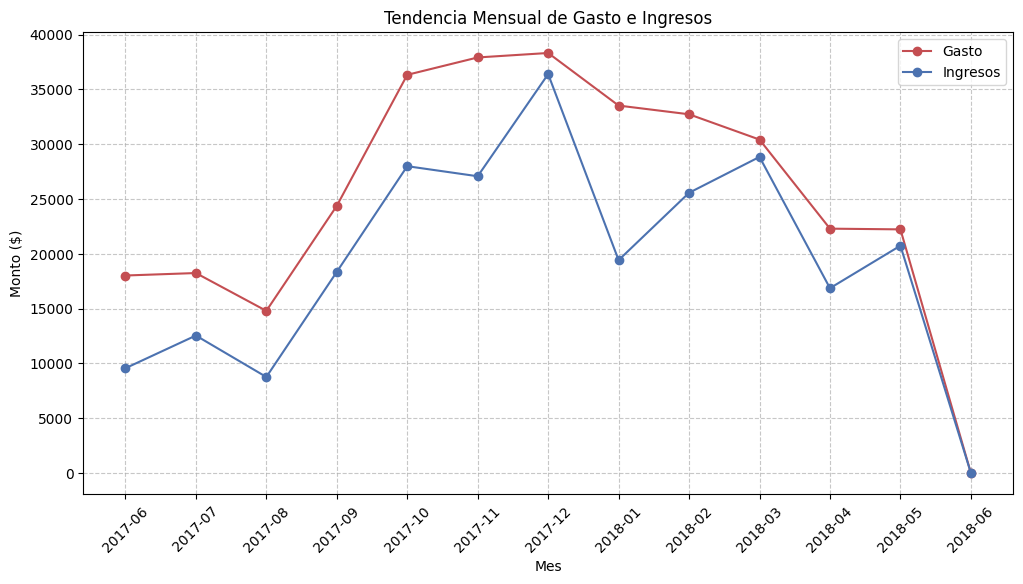

In [44]:
costs['month'] = costs['dt'].dt.to_period('M')
orders['month'] = orders['buy_ts'].dt.to_period('M')

# Agrupar por mes y sumar gastos e ingresos
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_revenue = orders.groupby('month')['revenue'].sum().reset_index()

# Unir ambos DataFrames para el gráfico
monthly_metrics = monthly_costs.merge(monthly_revenue, on='month', how='outer').fillna(0)
monthly_metrics['month'] = monthly_metrics['month'].astype(str)

fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de línea para Gasto e Ingresos
ax.plot(monthly_metrics['month'], monthly_metrics['costs'], marker='o', label='Gasto', color='#c44e52')
ax.plot(monthly_metrics['month'], monthly_metrics['revenue'], marker='o', label='Ingresos', color='#4c72b0')

ax.set_title('Tendencia Mensual de Gasto e Ingresos')
ax.set_xlabel('Mes')
ax.set_ylabel('Monto ($)')
ax.legend()
ax.grid(linestyle='--', alpha=0.7)
ax.tick_params(axis='x', rotation=45)

plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La repetición de gráficas se mantiene consistente y bien implementada, con comparaciones claras entre dispositivos, fuentes y métricas temporales. Refleja un manejo sólido de visualización para comunicar hallazgos. </div>


## Conclusión
    -Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde
    -¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los  valores métricos?

    -En este caso me enfocare en la mayor parte de métricas como cantidad de clientes, ventas, gastos, fechas, y que elementos convienen y cuales no.
    -Usan mas computadoras de escritorio que los dispositivos touch, en caso de solo estar bien habilitados solo para laptops o computadoras seria bueno poder habilitar para dispositivos celulares para aumentar disponibilidad de nuevos clientes.
    -En el romi hay una de dos que se invierta solo en la primera fuente, o invertir en la 2 o la 9 e invertir en el marketing para promocionar y subir ventas.
    -La fuente 10 del CAC tiene el costo mas bajo a comparación de la fuente numero 3 que es la más costosa, por lo que seria invertir en la adquisición de nuevos clientes de la fuente 10.
    -En enero el valor promedio de compra es el más bajo y en el número de pedidos mensuales de octubre a diciembre sube y baja en enero, asumiendo que en los gatos de marketing aumentan de octubre a diciembre y baja en enero da indicaciones de que se esta invirtiendo en algunas fuentes y publicidad donde disminuyen ventas y/o aumentan gastos.
    -Al parecer no hay un source id 8 y hay muy pocos datos del source id 7 y 6.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La conclusión resume de forma clara las métricas clave, vinculando dispositivos, fuentes de adquisición y temporalidad con recomendaciones prácticas de inversión. Se nota un buen criterio para priorizar fuentes con mejor ROMI y CAC, además de observaciones estratégicas útiles para marketing. </div>


## Comentario general del revisor 



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  

¡Felicidades! Tu proyecto está **aprobado**. Lograste un análisis sólido de los datos de Showz y presentaste un trabajo bien estructurado con métricas claras y visualizaciones pertinentes.

#### Puntos Positivos:

* **Procesamiento de datos:** Limpieza correcta, estandarización de columnas y conversión de tipos de datos bien aplicada.
* **Exploración y métricas:** Incluiste todos los indicadores clave solicitados: usuarios, sesiones, tiempos de conversión, AOV, LTV, CAC y ROMI.
* **Visualizaciones:** Gráficas variadas que comunican con claridad tendencias, comparaciones y distribuciones.
* **Conclusiones y recomendaciones:** Fundamentaste de manera precisa qué fuentes convienen más para la inversión en marketing y por qué.

Tu proyecto refleja un dominio adecuado de la preparación de datos, análisis exploratorio, métricas de negocio y comunicación de resultados. **Cumple con todos los requisitos establecidos en el brief.**

</div>  
